In [23]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, IBMQ
from qiskit.tools import job_monitor

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-04-01 14:12:22,953: Credentials are already in use. The existing account in the session will be replaced.


In [24]:
# az elérhető IBM Q gépek listája
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [32]:
def qubit_errors(backend_name, N):
    # a kvantumszámítógép lekérése
    backend = provider.get_backend(backend_name)
    # a qubitek száma a kvantumszámítógépen - ez lesz a kvantumos regiszterek száma az áramkörben
    n_qubits = backend.configuration().n_qubits
    
    circs = []
    
    for i in range(n_qubits):
        # a kétféle áramkör definiálása
        circ_0 = QuantumCircuit(n_qubits, 1)
        circ_0.measure(i, 0)
        circ_1 = QuantumCircuit(n_qubits, 1)
        circ_1.x(i)
        circ_1.measure(i, 0)
        circs.append(circ_0)
        circs.append(circ_1)
    # az áramkörök lefuttatása
    job = backend.run(circs, shots=N)
    job_monitor(job)
    # eredmények
    counts = job.result().get_counts()
    errors = []
    for j in range(n_qubits):
        error_01 = counts[2*j].get('1', 0) / N
        error_10 = counts[2*j+1].get('0', 0) / N
        errors.append([error_01, error_10])
    return errors

In [40]:
errors = qubit_errors('ibmq_quito', 1024)

Job Status: job has successfully run


In [41]:
errors

[[0.009765625, 0.0498046875],
 [0.005859375, 0.0419921875],
 [0.005859375, 0.029296875],
 [0.005859375, 0.056640625],
 [0.0048828125, 0.0458984375]]

In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [46]:
plt.style.use('default')

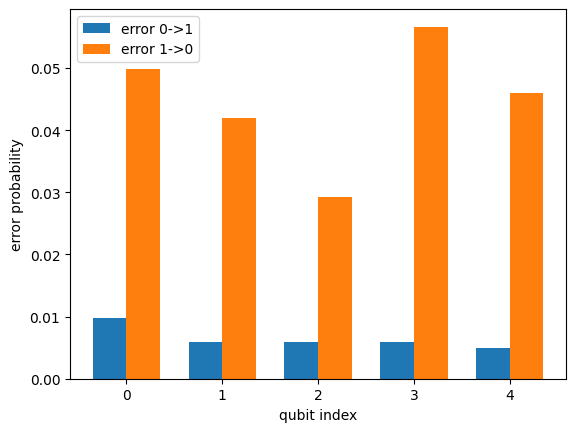

In [47]:
x = np.arange(5)
width = 0.35
errors = np.array(errors)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, errors[:, 0], width, label='error 0->1')
rects2 = ax.bar(x + width/2, errors[:, 1], width, label='error 1->0')
plt.xlabel('qubit index')
plt.ylabel('error probability')
plt.legend()